# Analysis of Passengers car

###### 

In [1]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
car_data = pd.read_csv("DS1_C4_S7_Car_Data_Challenge.csv")
car_data.shape

(1275, 137)

###### 

## TASK - 1 :

### Load the data into data frame and retain only the following column. Drop the rows with missing values only in the following columns.

In [4]:
a = car_data.isnull().sum()
a[a>0]

Make                     75
Displacement             12
Cylinders                66
Valves_Per_Cylinder     102
Drivetrain                7
                       ... 
USB_Ports              1246
Heads-Up_Display       1224
Welcome_Lights         1206
Battery                1262
Electric_Range         1258
Length: 131, dtype: int64

In [5]:
data =pd.concat([car_data["Cylinders"],car_data["Kerb_Weight"],car_data["Make"],car_data["Displacement"],car_data["Fuel_Tank_Capacity_litre"],
              car_data["City_Mileage_km_litre"],car_data["Highway_Mileage_km_litre"],car_data["Power"],car_data["Torque"]],axis=1)

In [6]:
data

,Cylinders,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
0,2.0,660 kg,Tata,624.0,24.0,23.60,NaN,38PS@5500rpm,51Nm@4000rpm
1,2.0,725 kg,Tata,624.0,24.0,23.60,NaN,38PS@5500rpm,51Nm@4000rpm
2,2.0,710 kg,Tata,624.0,15.0,NaN,NaN,38PS@5500rpm,51Nm@4000rpm
3,2.0,725 kg,Tata,624.0,24.0,23.60,NaN,38PS@5500rpm,51Nm@4000rpm
4,2.0,725 kg,Tata,624.0,24.0,23.60,NaN,38PS@5500rpm,51Nm@4000rpm
...,...,...,...,...,...,...,...,...,...
1270,4.0,1170 kg,Honda,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1271,4.0,1175 kg,Honda,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1272,4.0,1107 kg,Honda,1497.0,40.0,18.00,18.00,119PS@6600rpm,145Nm@4600rpm
1273,4.0,1080 kg,Honda,1497.0,40.0,14.30,16.40,119PS@6600rpm,145Nm@4600rpm


In [7]:
data = data.dropna() 

In [8]:
data.shape

(316, 9)

#### 

## TASK - 2 :

### Preprocess the data in the following columns as specified.

### Kerb_Weight

In [9]:
data["Kerb_Weight"] = data["Kerb_Weight"].str.replace(r"kg",'')
data["Kerb_Weight"] = data["Kerb_Weight"].astype(float)
data["Kerb_Weight"].dtypes
data["Kerb_Weight"] = data.loc[:,["Kerb_Weight"]]*2.2
data

,Cylinders,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,4.0,2024.0,Maruti Suzuki,1196.0,40.0,12.00,15.00,73PS@6000rpm,101Nm@3000rpm
25,4.0,2068.0,Maruti Suzuki,1196.0,40.0,12.00,15.00,74PS@6000RPM,101Nm@3000rpm
26,4.0,2041.6,Maruti Suzuki,1196.0,40.0,11.00,15.00,73PS@6000rpm,101Nm@3000rpm
29,3.0,1639.0,Maruti Suzuki,998.0,35.0,14.00,17.00,68PS@6000rpm,90Nm@3500rpm
30,3.0,1650.0,Maruti Suzuki,998.0,35.0,14.00,17.00,68PS@6200rpm,90Nm@3500rpm
...,...,...,...,...,...,...,...,...,...
1270,4.0,2574.0,Honda,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1271,4.0,2585.0,Honda,1498.0,40.0,22.60,25.10,100PS@3600rpm,200Nm@1750rpm
1272,4.0,2435.4,Honda,1497.0,40.0,18.00,18.00,119PS@6600rpm,145Nm@4600rpm
1273,4.0,2376.0,Honda,1497.0,40.0,14.30,16.40,119PS@6600rpm,145Nm@4600rpm


### Power

In [10]:
data["Power"] = data["Power"].str.strip ()
data["Power"] = data["Power"].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True)
data["Power"] = data["Power"].astype(float)
data

,Cylinders,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,4.0,2024.0,Maruti Suzuki,1196.0,40.0,12.00,15.00,73.0,101Nm@3000rpm
25,4.0,2068.0,Maruti Suzuki,1196.0,40.0,12.00,15.00,74.0,101Nm@3000rpm
26,4.0,2041.6,Maruti Suzuki,1196.0,40.0,11.00,15.00,73.0,101Nm@3000rpm
29,3.0,1639.0,Maruti Suzuki,998.0,35.0,14.00,17.00,68.0,90Nm@3500rpm
30,3.0,1650.0,Maruti Suzuki,998.0,35.0,14.00,17.00,68.0,90Nm@3500rpm
...,...,...,...,...,...,...,...,...,...
1270,4.0,2574.0,Honda,1498.0,40.0,22.60,25.10,100.0,200Nm@1750rpm
1271,4.0,2585.0,Honda,1498.0,40.0,22.60,25.10,100.0,200Nm@1750rpm
1272,4.0,2435.4,Honda,1497.0,40.0,18.00,18.00,119.0,145Nm@4600rpm
1273,4.0,2376.0,Honda,1497.0,40.0,14.30,16.40,119.0,145Nm@4600rpm


### Torque

In [11]:
data["Torque"] = data["Torque"].str.strip() 
data["Torque"] = data["Torque"].str.replace(r"-",'', regex=True)
data["Torque"] = data["Torque"].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True) 
data["Torque"] = data["Torque"].astype(float)
data

,Cylinders,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,4.0,2024.0,Maruti Suzuki,1196.0,40.0,12.00,15.00,73.0,101.0
25,4.0,2068.0,Maruti Suzuki,1196.0,40.0,12.00,15.00,74.0,101.0
26,4.0,2041.6,Maruti Suzuki,1196.0,40.0,11.00,15.00,73.0,101.0
29,3.0,1639.0,Maruti Suzuki,998.0,35.0,14.00,17.00,68.0,90.0
30,3.0,1650.0,Maruti Suzuki,998.0,35.0,14.00,17.00,68.0,90.0
...,...,...,...,...,...,...,...,...,...
1270,4.0,2574.0,Honda,1498.0,40.0,22.60,25.10,100.0,200.0
1271,4.0,2585.0,Honda,1498.0,40.0,22.60,25.10,100.0,200.0
1272,4.0,2435.4,Honda,1497.0,40.0,18.00,18.00,119.0,145.0
1273,4.0,2376.0,Honda,1497.0,40.0,14.30,16.40,119.0,145.0


## 

## TASK - 3 :

### For each column listed in task 1, calculate and display the mean, median and standard deviation and coefficient of variation for each manufacturer. for displacement column display the distribution for each manufacturer using box plot.

In [12]:
columns_to_calculate = ["Cylinders","Kerb_Weight","Displacement",
                        "Fuel_Tank_Capacity_litre","City_Mileage_km_litre","Highway_Mileage_km_litre","Power","Torque"]

manufacturers = data['Make'].unique()

for column in columns_to_calculate:
    print(f"\nStatistics for '{column}':\n")
    
    for manufacturer in manufacturers:
       
        manufacturer_df = data[data['Make'] == manufacturer]

        mean_value = manufacturer_df[column].mean()
        median_value = manufacturer_df[column].median()
        std_value = manufacturer_df[column].std()
        cv_value = std_value / mean_value * 100 
    
        print(f"Manufacturer : {manufacturer}")
        print(f"Mean: {mean_value}")
        print(f"Median: {median_value}")
        print(f"Standard Deviation: {std_value}")
        print(f"Coefficient of Variation: {cv_value:.2f}%\n")



Statistics for 'Cylinders':

Manufacturer : Maruti Suzuki
Mean: 3.4318181818181817
Median: 3.0
Standard Deviation: 0.5010559673853124
Coefficient of Variation: 14.60%

Manufacturer : Tata
Mean: 3.566666666666667
Median: 4.0
Standard Deviation: 0.504006932993731
Coefficient of Variation: 14.13%

Manufacturer : Premier
Mean: 4.0
Median: 4.0
Standard Deviation: 0.0
Coefficient of Variation: 0.00%

Manufacturer : Toyota
Mean: 4.117647058823529
Median: 4.0
Standard Deviation: 0.6859943405700354
Coefficient of Variation: 16.66%

Manufacturer : Hyundai
Mean: 4.0
Median: 4.0
Standard Deviation: 0.0
Coefficient of Variation: 0.00%

Manufacturer : Volkswagen
Mean: 3.7
Median: 4.0
Standard Deviation: 0.48304589153964794
Coefficient of Variation: 13.06%

Manufacturer : Mahindra
Mean: 4.0
Median: 4.0
Standard Deviation: 0.0
Coefficient of Variation: 0.00%

Manufacturer : Fiat
Mean: 4.0
Median: 4.0
Standard Deviation: 0.0
Coefficient of Variation: 0.00%

Manufacturer : Skoda
Mean: 4.0
Median: 4.0
S

<Figure size 700x400 with 0 Axes>

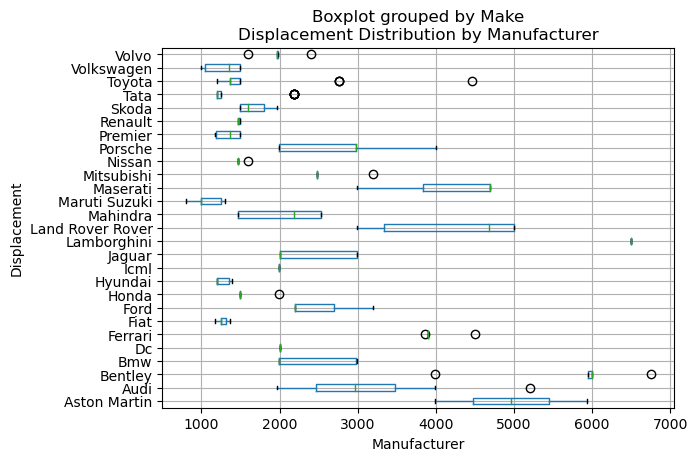

In [13]:
plt.figure(figsize=(7,4))
data.boxplot(column='Displacement', by='Make',vert=0)
plt.title('Displacement Distribution by Manufacturer')
plt.ylabel('Displacement')
plt.xlabel('Manufacturer')
plt.show()

In [14]:
Mean =  data.groupby(by="Make").mean()
Median =  data.groupby(by="Make").median()
std_dev =  data.groupby(by="Make").std()
co_variance = (std_dev/Mean)*100

In [15]:
Mean

,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
Make,,,,,,,,
Aston Martin,10.000000,3872.000000,4958.500000,81.750000,7.050000,10.450000,532.500000,657.500000
Audi,6.285714,4191.000000,3147.714286,67.857143,11.042857,12.942857,314.714286,528.571429
Bentley,10.400000,5420.360000,5738.200000,89.000000,5.020000,7.840000,566.600000,820.000000
Bmw,4.857143,3772.057143,2419.142857,64.714286,12.760000,14.618571,273.857143,458.571429
Dc,4.000000,3476.000000,2000.000000,60.000000,8.000000,10.000000,250.000000,340.000000
Ferrari,8.000000,3344.000000,4011.600000,84.000000,4.320000,6.900000,634.800000,715.000000
Fiat,4.000000,2700.400000,1273.818182,45.000000,13.854545,18.409091,91.181818,187.636364
Ford,4.333333,5038.000000,2531.333333,80.000000,8.766667,12.050000,173.333333,413.333333
Honda,4.000000,2635.947368,1523.473684,41.894737,16.289474,19.310526,113.368421,166.842105


In [16]:
Median

,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
Make,,,,,,,,
Aston Martin,10.0,3872.0,4958.5,81.75,7.05,10.450,532.5,657.5
Audi,6.0,4389.0,2967.0,75.00,9.30,12.600,249.0,600.0
Bentley,12.0,5328.4,5998.0,90.00,5.30,8.600,590.0,800.0
Bmw,4.0,3751.0,1998.0,67.00,13.10,16.100,248.0,400.0
Dc,4.0,3476.0,2000.0,60.00,8.00,10.000,250.0,340.0
Ferrari,8.0,3245.0,3902.0,86.00,3.20,5.500,669.0,760.0
Fiat,4.0,2719.2,1248.0,45.00,12.00,19.500,93.0,207.0
Ford,4.0,4923.6,2198.0,80.00,9.30,12.620,160.0,385.0
Honda,4.0,2585.0,1497.0,40.00,14.30,16.400,119.0,145.0


In [17]:
std_dev

,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
Make,,,,,,,,
Aston Martin,2.828427,715.592063,1380.979544,12.374369,2.899138,3.464823,38.890873,38.890873
Audi,2.138090,1001.604213,1141.945958,12.198751,4.933848,3.947513,191.174191,148.708728
Bentley,2.190890,298.566019,1031.184368,2.236068,3.189357,3.888830,52.998113,143.527001
Bmw,1.069045,164.651823,528.085356,6.524678,3.657850,4.347698,104.279158,90.448617
Dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ferrari,0.000000,277.845281,272.108986,6.000000,1.533623,1.917029,50.325938,97.851929
Fiat,0.000000,73.930237,64.531881,0.000000,2.849338,2.482521,14.344464,41.085941
Ford,0.577350,198.146612,577.350269,0.000000,0.923760,0.987269,23.094011,49.074773
Honda,0.000000,284.449463,113.702032,4.495612,4.056667,4.098359,12.019477,26.885071


In [18]:
co_variance

,Cylinders,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
Make,,,,,,,,
Aston Martin,28.284271,18.481200,27.850752,15.136842,41.122522,33.156203,7.303450,5.914962
Audi,34.015067,23.898931,36.278577,17.977107,44.679090,30.499547,60.745317,28.134084
Bentley,21.066252,5.508232,17.970520,2.512436,63.533014,49.602425,9.353709,17.503293
Bmw,22.009749,4.365041,21.829441,10.082285,28.666536,29.740925,38.077940,19.723998
Dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ferrari,0.000000,8.308770,6.783054,7.142857,35.500536,27.783028,7.927841,13.685584
Fiat,0.000000,2.737751,5.066020,0.000000,20.566088,13.485298,15.731715,21.896577
Ford,13.323468,3.933041,22.808149,0.000000,10.537191,8.193103,13.323468,11.872929
Honda,0.000000,10.791166,7.463341,10.730732,24.903612,21.223447,10.602139,16.114080


### 

## TASK - 4 :

### Identify at least three features that affect the mileages (using correlation analysis) of the following manufacturers and represent them visually using appropriate types of charts/ghraphs in Pythn : 1) Renualt , 2) Toyota, 3) Honda. Illustrate with justification if these factors affect the mileage of a car positively or negatively.

In [19]:
Renault = car_data[car_data["Make"]=="Renault"]

Text(0.5, 0, 'R = -0.7928356204038628')

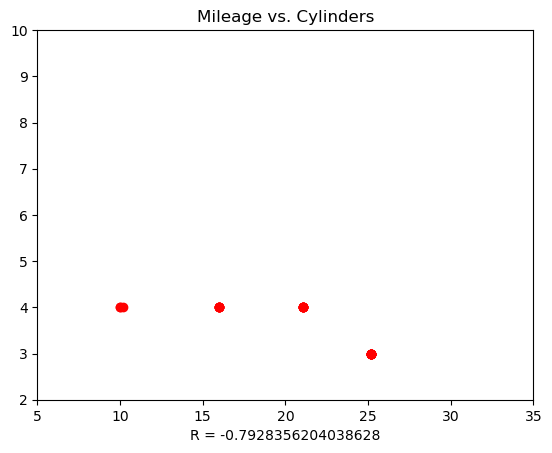

In [20]:
mc_corr=Renault['City_Mileage_km_litre'].corr(Renault['Cylinders'])

plt.scatter(Renault['City_Mileage_km_litre'],Renault['Cylinders'], color='red')
plt.title('Mileage vs. Cylinders')
plt.xlim(5,35)
plt.ylim(2,10.0)
plt.xlabel("R = "+str(mc_corr))

Text(0.5, 0, 'R = -0.7918385589035214')

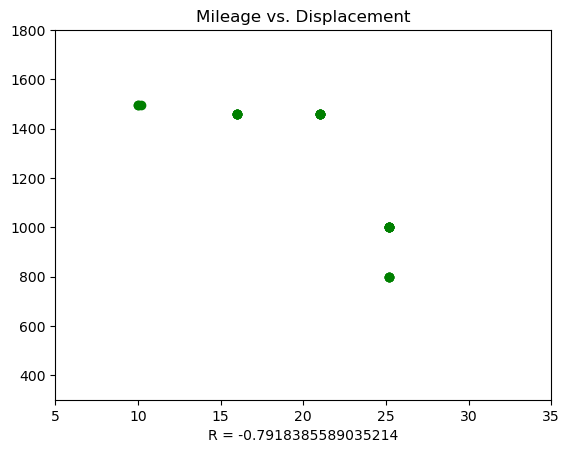

In [21]:
md_corr=Renault['City_Mileage_km_litre'].corr(Renault['Displacement'])

plt.scatter(Renault['City_Mileage_km_litre'],Renault['Displacement'], color='green')
plt.title('Mileage vs. Displacement')
plt.xlim(5,35)
plt.ylim(300,1800)
plt.xlabel("R = "+str(md_corr))

Text(0.5, 0, 'R = nan')

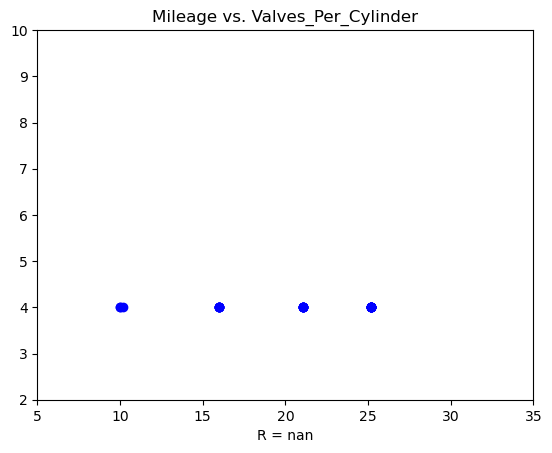

In [22]:
md_corr=Renault['City_Mileage_km_litre'].corr(Renault['Valves_Per_Cylinder'])

plt.scatter(Renault['City_Mileage_km_litre'],Renault['Valves_Per_Cylinder'], color='blue')
plt.title('Mileage vs. Valves_Per_Cylinder')
plt.xlim(5,35)
plt.ylim(2,10)
plt.xlabel("R = "+str(md_corr))

In [23]:
Toyota = car_data[car_data["Make"]=="Toyota"]

Text(0.5, 0, 'R = -0.2905263810566183')

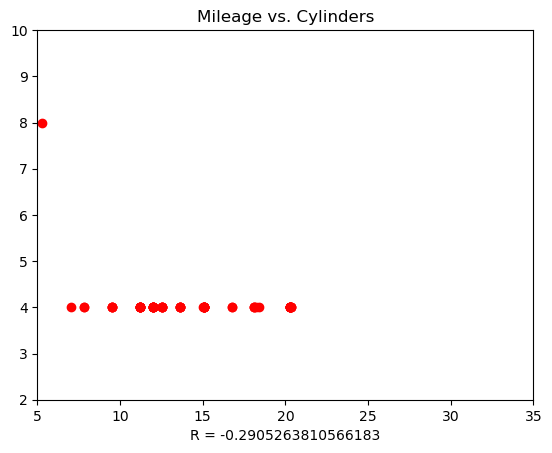

In [24]:
mc_corr=Toyota['City_Mileage_km_litre'].corr(Toyota['Cylinders'])

plt.scatter(Toyota['City_Mileage_km_litre'],Toyota['Cylinders'], color='red')
plt.title('Mileage vs. Cylinders')
plt.xlim(5,35)
plt.ylim(2,10.0)
plt.xlabel("R = "+str(mc_corr))

Text(0.5, 0, 'R = -0.7644042107236677')

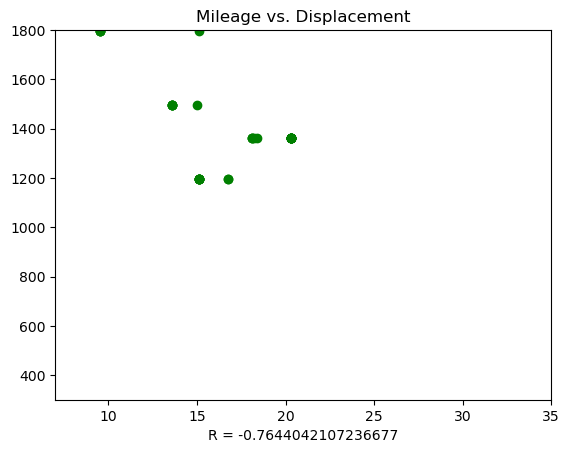

In [25]:
md_corr=Toyota['City_Mileage_km_litre'].corr(Toyota['Displacement'])

plt.scatter(Toyota['City_Mileage_km_litre'],Toyota['Displacement'], color='green')
plt.title('Mileage vs. Displacement')
plt.xlim(7,35)
plt.ylim(300,1800)
plt.xlabel("R = "+str(md_corr))

Text(0.5, 0, 'R = -0.7940861335112755')

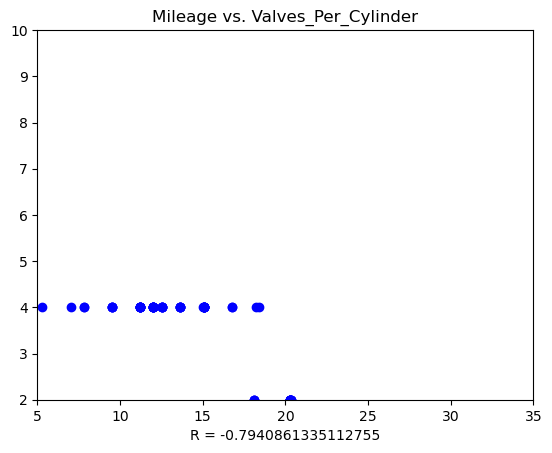

In [26]:
md_corr=Toyota['City_Mileage_km_litre'].corr(Toyota['Valves_Per_Cylinder'])

plt.scatter(Toyota['City_Mileage_km_litre'],Toyota['Valves_Per_Cylinder'], color='blue')
plt.title('Mileage vs. Valves_Per_Cylinder')
plt.xlim(5,35)
plt.ylim(2,10)
plt.xlabel("R = "+str(md_corr))

In [27]:
Honda = car_data[car_data["Make"]=="Honda"]

Text(0.5, 0, 'R = nan')

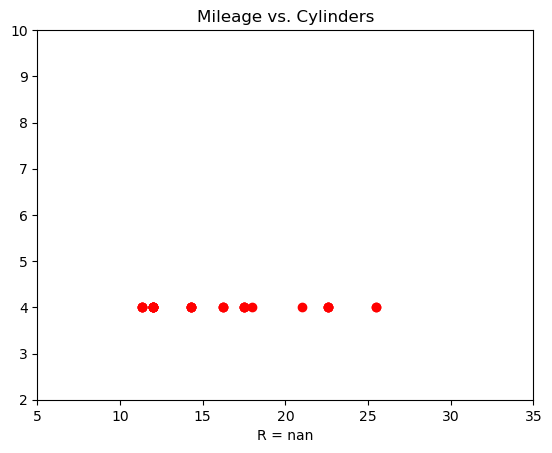

In [28]:
mc_corr=Honda['City_Mileage_km_litre'].corr(Honda['Cylinders'])

plt.scatter(Honda['City_Mileage_km_litre'],Honda['Cylinders'], color='red')
plt.title('Mileage vs. Cylinders')
plt.xlim(5,35)
plt.ylim(2,10.0)
plt.xlabel("R = "+str(mc_corr))

Text(0.5, 0, 'R = 0.28792239949187043')

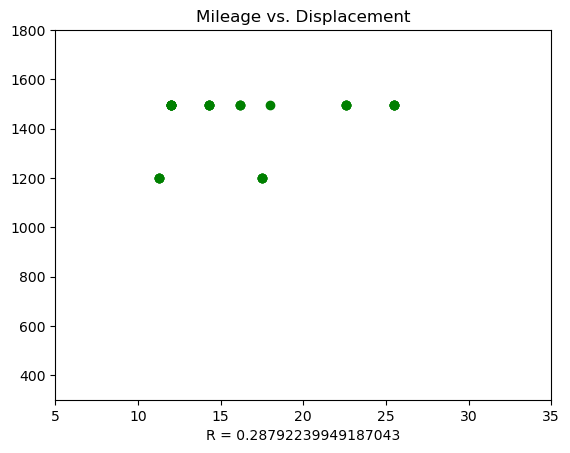

In [29]:
md_corr=Honda['City_Mileage_km_litre'].corr(Honda['Displacement'])

plt.scatter(Honda['City_Mileage_km_litre'],Honda['Displacement'], color='green')
plt.title('Mileage vs. Displacement')
plt.xlim(5,35)
plt.ylim(300,1800)
plt.xlabel("R = "+str(md_corr))

Text(0.5, 0, 'R = nan')

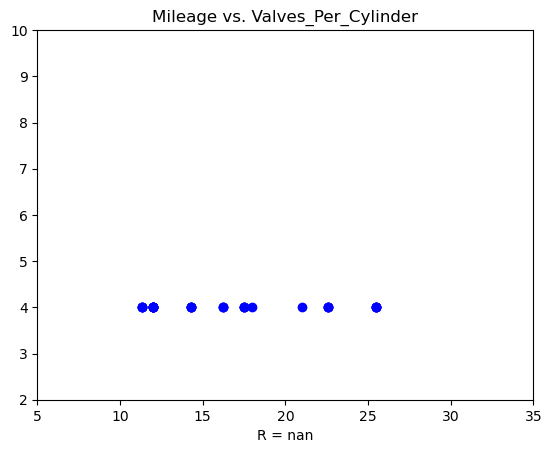

In [30]:
md_corr=Honda['City_Mileage_km_litre'].corr(Honda['Valves_Per_Cylinder'])

plt.scatter(Honda['City_Mileage_km_litre'],Honda['Valves_Per_Cylinder'], color='blue')
plt.title('Mileage vs. Valves_Per_Cylinder')
plt.xlim(5,35)
plt.ylim(2,10)
plt.xlabel("R = "+str(md_corr))

###  Interpretation : 
### There is a negative correlation between mileage and the number of cylinders, as well as between mileage and engine displacement, across all three car manufacturers (Renault, Toyota, and Honda). Additionally, there is no significant relationship between mileage and the number of valves per cylinder.